# 차원 축소

## 공통 코드

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
#이미지를 저장할 디렉토리 생성
os.makedirs(IMAGES_PATH, exist_ok=True)

#이미지를 저장할 때 사용하기 위한 함수
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
from matplotlib import font_manager, rc
import platform

#한글 출력을 위한 부분
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

#음수 출력을 위한 부분
mpl.rcParams['axes.unicode_minus'] = False

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3

#그래픽 출력을 조금 더 고급화하기 위한 라이브러리
import seaborn as sns

#과학 기술 통계 라이브러리
import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수: 0.20 에서 데이터 변환을 위한 Transformer 클래스가 추가됨
import sklearn
assert sklearn.__version__ >= "0.20"

# 데이터를 분할할 때 동일한 분할을 만들기 위해서
# 모델을 만드는 작업을 여러 번에 걸쳐서 하는 경우 시드가 변경이 되서 훈령용 데이터가
# 자주 변경되면 결국 모든 데이터를 가지고 모델을 생성하는 결과
# Overfit이 될 가능성이 높아짐
np.random.seed(42)

## PCA

### 특이값 분해(SVD)를 이용한 행렬 분해

In [2]:
np.random.seed(42)
m = 60
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles) / 2 + 0.1 * np.random.randn(m) / 2
#여기서의 0.1 은 잡음을 섞기 위한 것이서 아무 숫자나 가능
X[:, 1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
#0.1 과 0.3 은 데이터 변환을 위한 가중치라서 아무거나 가능
#여기서의 뒤의 0.1 은 잡음을 섞기 위한 것이서 아무 숫자나 가능
X[:, 2] = X[:, 0] * 0.1 + X[:, 1] * 0.3 + 0.1 * np.random.randn(m)

X_centered = X - X.mean(axis=0)
#특이값 분해 수행
U, s, Vt = np.linalg.svd(X_centered)
#주성분
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]


#실제 변환된 결과
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)
print(X2D) #차원이 1개 줄어듬

[[-0.69  -0.362]
 [ 1.396  0.345]
 [ 1.007 -0.35 ]
 [ 0.274 -0.505]
 [-0.913  0.263]
 [-0.797  0.267]
 [-0.552  0.651]
 [ 1.416  0.166]
 [ 0.408 -0.461]
 [ 0.852 -0.405]
 [-0.463  0.62 ]
 [ 1.283  0.41 ]
 [ 1.375  0.036]
 [-0.969  0.109]
 [-0.972  0.144]
 [-1.052  0.077]
 [-0.928 -0.224]
 [-0.015 -0.415]
 [-0.47  -0.469]
 [-0.878 -0.085]
 [ 0.39  -0.452]
 [-0.97   0.198]
 [-0.937 -0.093]
 [-0.813 -0.261]
 [-0.414 -0.42 ]
 [ 1.283 -0.026]
 [-0.952  0.232]
 [-0.201 -0.491]
 [ 0.34  -0.413]
 [-0.591  0.585]
 [ 0.548 -0.438]
 [-0.995  0.144]
 [-0.586  0.574]
 [ 1.394  0.39 ]
 [ 1.336  0.386]
 [ 1.416  0.046]
 [-0.926 -0.185]
 [-0.78   0.348]
 [ 0.747 -0.262]
 [-0.48  -0.475]
 [-0.752  0.378]
 [-0.183 -0.493]
 [-0.511  0.635]
 [ 1.397  0.326]
 [-0.971 -0.084]
 [ 0.608 -0.493]
 [-0.933 -0.207]
 [-0.15  -0.522]
 [ 0.097 -0.487]
 [-0.947  0.144]
 [ 1.368  0.427]
 [ 1.255 -0.122]
 [ 1.358  0.29 ]
 [ 1.386  0.216]
 [ 0.383 -0.38 ]
 [ 1.399  0.269]
 [-0.658  0.41 ]
 [-0.921  0.158]
 [-0.538  0.47

In [3]:
#sklearn의 PCA가 SVD를 이용
m = 60
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
#print(X)

X[:, 0] = np.cos(angles) + np.sin(angles) / 2 + 0.1 * np.random.randn(m) / 2
#여기서의 0.1 은 잡음을 섞기 위한 것이서 아무 숫자나 가능
X[:, 1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
#0.1 과 0.3 은 데이터 변환을 위한 가중치라서 아무거나 가능
#여기서의 뒤의 0.1 은 잡음을 섞기 위한 것이서 아무 숫자나 가능
X[:, 2] = X[:, 0] * 0.1 + X[:, 1] * 0.3 + 0.1 * np.random.randn(m)
#print(X)


from sklearn.decomposition import PCA
#2개의 주성분을 추출해주는 PCA 인스턴스
pca = PCA(n_components=2)
#데이터를 2차원으로 줄이기
X2D = pca.fit_transform(X)
print(X2D)


[[-0.525  0.628]
 [-0.537  0.552]
 [ 1.362  0.136]
 [-0.733 -0.3  ]
 [-0.801  0.399]
 [ 0.039 -0.457]
 [ 1.207  0.046]
 [-0.94   0.025]
 [ 0.602 -0.223]
 [-0.727  0.443]
 [-0.657  0.529]
 [ 0.141 -0.41 ]
 [ 0.032 -0.367]
 [ 0.738 -0.326]
 [ 1.097  0.038]
 [ 1.297  0.743]
 [-0.016 -0.398]
 [-0.8   -0.258]
 [ 1.278  0.103]
 [-0.894 -0.171]
 [-0.358 -0.428]
 [-0.736  0.433]
 [-0.486  0.594]
 [ 1.392  0.698]
 [ 1.294  0.232]
 [ 0.92  -0.132]
 [-0.596 -0.438]
 [-0.937  0.209]
 [-0.88   0.125]
 [-0.951 -0.199]
 [ 0.142 -0.394]
 [ 0.966 -0.14 ]
 [ 0.753 -0.287]
 [-0.931 -0.164]
 [ 1.299  0.637]
 [ 1.124 -0.056]
 [ 0.159 -0.438]
 [ 0.56  -0.243]
 [-0.461 -0.376]
 [-0.971 -0.02 ]
 [-0.783 -0.377]
 [ 1.115 -0.036]
 [-0.52   0.485]
 [-0.79   0.378]
 [-0.618  0.46 ]
 [-0.496  0.587]
 [ 1.373  0.266]
 [ 0.983 -0.084]
 [-0.232 -0.405]
 [-0.765  0.432]
 [-0.048 -0.279]
 [-0.33  -0.393]
 [-0.836  0.232]
 [-0.376 -0.454]
 [-0.644 -0.401]
 [ 0.496 -0.387]
 [ 0.608 -0.317]
 [-0.56   0.611]
 [-0.659 -0.3 

In [4]:
#분산의 비율
print("설명 가능한 분산의 비율:", pca.explained_variance_ratio_)
#[0.808, 0.179]
#첫번째 주성분이 0.808 만큼의 분산을 설명
#두번째 주성분은 0.179 만큼의 분산을 설명
#2개의 주성분이 있으면 0.987 만큼의 분산을 설명

print("잃어버린 분산의 비율:", (1 - pca.explained_variance_ratio_.sum()))

설명 가능한 분산의 비율: [0.808 0.179]
잃어버린 분산의 비율: 0.013215124024098523


In [5]:
m = 60
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))

X[:, 0] = np.cos(angles) + np.sin(angles) / 2 + 0.1 * np.random.randn(m) / 2
#여기서의 0.1 은 잡음을 섞기 위한 것이서 아무 숫자나 가능
X[:, 1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
#0.1 과 0.3 은 데이터 변환을 위한 가중치라서 아무거나 가능
#여기서의 뒤의 0.1 은 잡음을 섞기 위한 것이서 아무 숫자나 가능
X[:, 2] = X[:, 0] * 0.1 + X[:, 1] * 0.3 + 0.1 * np.random.randn(m)
#원본 데이터 5개 출력
print(X[:5])

pca = PCA(n_components=2)
#데이터를 2차원으로 줄이기
X2D = pca.fit_transform(X)
#2차원으로 줄어든 데이터를 이용해서 복원
X3D_inverse = pca.inverse_transform(X2D)
print(X3D_inverse[:5])

[[-0.686  0.353  0.085]
 [ 1.036  0.194  0.184]
 [ 1.162  0.291  0.125]
 [ 0.897 -0.108  0.104]
 [ 1.032  0.248  0.366]]
[[-0.681  0.367  0.035]
 [ 1.039  0.202  0.155]
 [ 1.157  0.274  0.187]
 [ 0.902 -0.095  0.059]
 [ 1.05   0.299  0.183]]


In [6]:
#2개의 배열이 같은지 확인
print(np.allclose(np.array([1, 2, 3]), np.array([1, 2, 3])))
print(np.allclose(X, X3D_inverse))

True
False


In [7]:
#오차의 평균
print(np.mean(np.sum(np.square(X3D_inverse - X), axis=1)))

0.011314282069198149


In [8]:
#각행의 오차 합 구하기 - 이를 이용해서 이상치 탐지를 할 수 있습니다.
#이상치는 복원을 했을 때 오차가 크게 발생
print(np.sum(abs(X3D_inverse - X), axis=1))

[6.944e-02 3.988e-02 8.525e-02 6.235e-02 2.511e-01 1.901e-01 2.159e-01
 6.100e-02 1.206e-01 5.122e-03 1.981e-02 1.611e-01 1.931e-01 2.018e-01
 2.030e-02 5.954e-02 1.151e-01 2.086e-01 9.290e-02 4.967e-03 1.637e-01
 1.420e-01 4.806e-02 2.108e-01 1.862e-02 1.714e-01 7.627e-03 1.279e-02
 3.293e-01 1.533e-02 5.479e-03 8.688e-02 2.332e-01 1.602e-01 2.973e-02
 1.531e-01 3.473e-01 2.614e-02 7.412e-03 1.849e-02 4.397e-02 1.350e-04
 5.166e-02 4.723e-02 5.487e-03 4.440e-02 7.442e-02 3.824e-02 2.574e-02
 1.755e-01 3.228e-01 1.471e-01 1.545e-01 2.413e-01 3.857e-02 2.945e-02
 1.592e-01 9.795e-02 1.172e-01 2.308e-01]


In [9]:
#주성분 확인
print(pca.components_)

[[-0.982 -0.135 -0.132]
 [ 0.165 -0.954 -0.25 ]]


### 주식 데이터를 이용한 주성분 분석

In [10]:
sp500_px = pd.read_csv('./data/sp500_data.csv.gz', index_col=0)
oil_px = sp500_px[['XOM', 'CVX']]
print(oil_px.head())

                 XOM       CVX
1993-01-29 -0.016991  0.072921
1993-02-01  0.016991  0.102089
1993-02-02  0.084954  0.029168
1993-02-03  0.067964  0.058337
1993-02-04  0.034378  0.044272


In [11]:
pca = PCA(n_components=2)
pca.fit(oil_px)
#주성분 분석 결과를 DataFrame 으로 생성
loadings = pd.DataFrame(pca.components_, columns=oil_px.columns)
print(loadings)

        XOM       CVX
0 -0.664711 -0.747101
1  0.747101 -0.664711


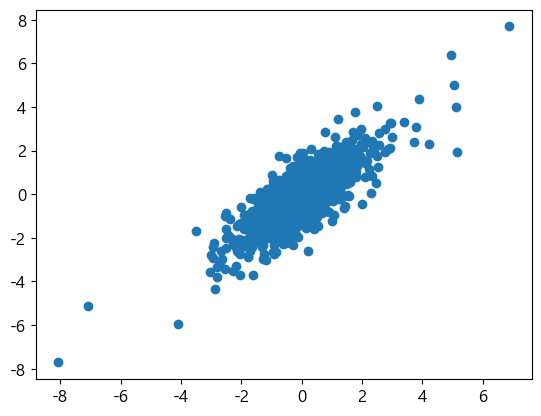

In [12]:
plt.scatter(oil_px['XOM'], oil_px['CVX'])

def abline(slope, intercept, ax):
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope * x_vals)

ax = oil_px.plot.scatter(x='XOM', y='CVX', alpha=0.3, figsize=(4, 4))

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

ax.plot(*abline(loadings.loc[0, 'CVX'] / loadings.loc[0, 'XOM'], 0, ax),
       '--', color='C1')
ax.plot(*abline(loadings.loc[1, 'CVX'] / loadings.loc[1, 'XOM'], 0, ax),
       '--', color='C1')
plt.show()



### 피처의 중요도를 파악

In [13]:
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP',
              'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]
print(top_sp.head())

                AAPL       AXP       COP      COST      CSCO       CVX  \
2011-01-03  0.527368  0.093870 -0.336272 -0.240605  0.035704  0.240681   
2011-01-04 -0.154321 -0.431788 -0.463161 -0.171859  0.008926 -0.584516   
2011-01-05  0.597152  0.895406 -0.057104 -0.859307  0.169599  0.446985   
2011-01-06 -0.132850 -0.612646 -0.463161  0.249200  0.035706 -0.919751   
2011-01-07  0.285820 -0.537242 -0.006350 -0.257788  0.098187  0.180511   

                  HD      INTC       JPM      MSFT       SLB       TGT  \
2011-01-03  0.099184 -0.137211  0.512093 -0.061805 -0.325923  0.455646   
2011-01-04 -0.541005  0.025726  0.335894  0.132440 -2.030049 -0.580720   
2011-01-05 -0.054099 -0.214392  0.689468  0.088294  1.536499 -0.482448   
2011-01-06 -0.189354  0.085757  0.070713  0.688689 -1.927614 -0.786210   
2011-01-07 -0.036064 -0.042878 -0.795539 -0.035317  0.931215 -0.089345   

                 USB       WFC       WMT       XOM  
2011-01-03 -0.234866  0.250042  0.294839  0.736805  
2011

In [14]:
#피처의 중요도를 파악할 것이라서 주성분의 개수를 설정하지 않음
sp_pca = PCA()
sp_pca.fit(top_sp)

PCA()

In [15]:
#설명 가능한 분산의 비율을 확인
print(sp_pca.explained_variance_)

[3.215 1.037 0.759 0.449 0.384 0.301 0.205 0.175 0.152 0.151 0.129 0.106
 0.06  0.05  0.03  0.026]


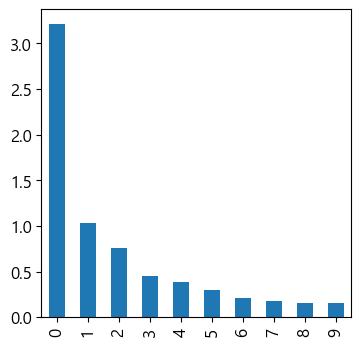

In [16]:
explained_variance = pd.DataFrame(sp_pca.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4, 4))
ax.set_label('COMPONANT')
plt.show()

In [17]:
#5개의 주성분에 미치는 중요도를 DataFrame으로 생성
loadings = pd.DataFrame(sp_pca.components_[0:5, :], columns=top_sp.columns)
print(loadings)

       AAPL       AXP       COP      COST      CSCO       CVX        HD  \
0 -0.300825 -0.246332 -0.261529 -0.273634 -0.064059 -0.444490 -0.207983   
1 -0.505116 -0.139426  0.174212 -0.416307 -0.031939  0.289373 -0.278002   
2 -0.786730  0.135458 -0.002367  0.465862 -0.007524  0.082374  0.166320   
3 -0.120586  0.061814 -0.206026  0.092596  0.003904 -0.577665  0.162814   
4  0.111576 -0.596666 -0.005813  0.555529 -0.039860  0.109016 -0.185488   

       INTC       JPM      MSFT       SLB       TGT       USB       WFC  \
0 -0.076956 -0.196397 -0.105012 -0.481786 -0.148833 -0.116421 -0.145684   
1 -0.033898 -0.040723 -0.053954  0.472494 -0.228123 -0.054796 -0.047427   
2 -0.003518  0.062261  0.016248 -0.194822  0.160833  0.048976  0.041932   
3 -0.001605  0.057687 -0.012558  0.680914  0.109895  0.016752  0.018614   
4 -0.072047 -0.385160 -0.077135  0.181332 -0.055557 -0.155440 -0.216425   

        WMT       XOM  
0 -0.122304 -0.317952  
1 -0.222889  0.154192  
2  0.175806  0.090167  
3 

c:\Users\USER\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


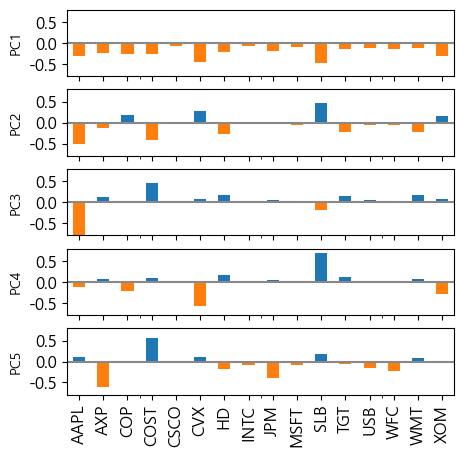

In [18]:
#스크리 그래프 - 주성분 분석 후 주성분에 대한 피처의 중요도를 시각화
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:5, :])))

#세로로 5개의 영역을 만들고 x 축을 공유
f, axes = plt.subplots(5, 1, figsize=(5, 5), sharex = True)

for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    #양수면 파랑 음수면 오렌지
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings ]
    ax.axhline(color = '#888888')
    pc_loadings.plot.bar(ax = ax, color=colors)
    ax.set_ylabel('PC' + str(i+1))
    ax.set_ylim(-maxPC, maxPC)

plt.show()

### MNIST 이미지에서 적절한 차원 수를 찾고 이미지를 압축해서 출력

In [19]:
#데이터 가져오기
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(type(mnist.target[0]))
mnist.target = mnist.target.astype(np.uint8)

X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)

c:\Users\USER\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<class 'str'>
(52500, 784)


In [20]:
#적절한 차원의 개수를 찾기 위해서 차원의 개수를 설정하지 않고 분산의 비율보다 큰 개수를 찾기
pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

154


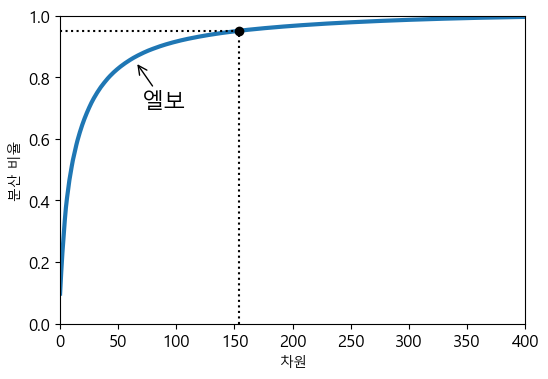

In [21]:
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel('차원')
plt.ylabel('분산 비율')
plt.plot([d, d], [0, 0.95], 'k:')
plt.plot([0, d], [0.95, 0.95], 'k:')
plt.plot(d, 0.95, 'ko')
plt.annotate("엘보", xy=(65, 0.85), xytext=(70, 0.7),
            arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.show()

In [22]:
#분산 비율일 0.95 이상인 PCA 만들기
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)
print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))

154
0.9504343526773377


### 복원한 이미지 와 원래 이미지를 출력

In [23]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)
print(X_recovered.shape)

(52500, 784)


In [24]:
def plot_digits(instances, images_per_row = 5, **options):
    size = 28
    #한 줄에 출력할 이미지 개수 설정
    image_per_row = min(len(instances), images_per_row)
    #1차원 이미지를 2차원으로 재구성
    images = [instance.reshape(size, size) for instance in instances]
    #행의 개수 계산
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images=[]
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size * size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis('off')
    

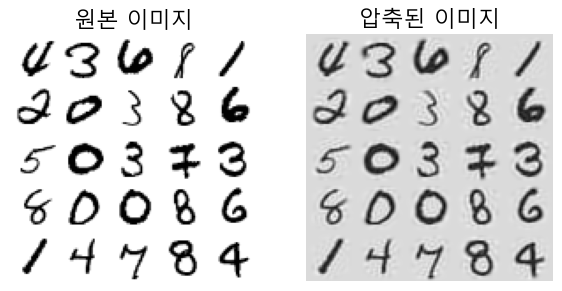

In [25]:
plt.figure(figsize=(7, 4))

plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("원본 이미지", fontsize=16)

plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("압축된 이미지", fontsize=16)

plt.show()

In [26]:
%%time
pca = PCA(n_components = 154, svd_solver='full')
X_reduced = pca.fit_transform(X_train)

CPU times: total: 24.1 s
Wall time: 3.55 s


In [27]:
%%time
pca = PCA(n_components = 154, svd_solver='randomized')
X_reduced = pca.fit_transform(X_train)

CPU times: total: 13.4 s
Wall time: 2.31 s


In [28]:
%%time
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)

CPU times: total: 13 s
Wall time: 2.31 s


### 랜덤 PCA 와 점진적 PCA 의 시간 복잡도

In [ ]:
# 훈련 데이터 가져오기
# 로컬에 있는 데이터를 메모리에 전부 로드된 것 처럼 사용
filename = "./data/MNIST/raw/train-images.idx3-ubyte"
m, n = X_train.shape

# filename에 데이터를 메모리에 전부 로드한 것 처럼 사용
# 사용할 때 메모리에 로드
# 메모리는 한정된 자원인데 메모리 크기보다 큰 데이터를 가지고 훈련하는 경우 사용
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

In [34]:
print(m, n)

52500 784


In [35]:
# 훈련 데이터 가져오기
del X_mm # 변수 지우기 - 메모리가 부족하면 gc 를 호출하는 것을 고려

n_batches = 100

# 데이터 가져오기
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

# 미니 배치의 크기 설정 - 525개
batch_size = m // n_batches

from sklearn.decomposition import IncrementalPCA

inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

# 일반 PCA 는 n_components 를 설정할 때 0.0 ~ 1.0 사이로 설정하면 분산의 비율
# 2보다 큰 정수를 사용하면 주성분의 개수
# RandomPCA 는 정수로만 설정
# 주성분의 개수를 보고 가장 근사한 값을 찾아가는 방식
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

In [36]:
# 주성분의 개수에 따른 시간 복잡도
import time
for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components, svd_solver="full")
    # 데이터를 나누어서 훈련하므로 많은 양의 데이터나 온라인 학습에 적용
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    # 주성분의 개수에 영향을 많이 받음
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")
    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print(" {}: {:.1f} 초".format(pca.__class__.__name__, t2 - t1))

n_components = 2
 PCA: 3.7 초
 IncrementalPCA: 17.4 초
 PCA: 0.8 초
n_components = 10
 PCA: 3.9 초
 IncrementalPCA: 17.8 초
 PCA: 0.9 초
n_components = 154
 PCA: 3.8 초
 IncrementalPCA: 20.8 초
 PCA: 2.4 초


In [38]:
# 시간 복잡도 - 데이터의 개수에 따른 시간 복잡도
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000]
for n_samples in sizes:
    print('데이터의 개수 : ', n_samples)
    X = np.random.randn(n_samples, 5)
    regular_pca = PCA(n_components=2, svd_solver="full")
    # 주성분의 개수에 영향을 많이 받음
    rnd_pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
    # 데이터를 나누어 훈련하므로 많은 양의 데이터나 온라인 학습에 적용
    inc_pca = IncrementalPCA(n_components=2, batch_size=500)

    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X)
        t2 = time.time()
        print('class name :', pca.__class__.__name__, '시간 :', t2-t1)

데이터의 개수 :  1000
class name : PCA 시간 : 0.0019986629486083984
class name : IncrementalPCA 시간 : 0.0010187625885009766
class name : PCA 시간 : 0.0019822120666503906
데이터의 개수 :  10000
class name : PCA 시간 : 0.0030057430267333984
class name : IncrementalPCA 시간 : 0.014997005462646484
class name : PCA 시간 : 0.01100015640258789
데이터의 개수 :  20000
class name : PCA 시간 : 0.003999948501586914
class name : IncrementalPCA 시간 : 0.024998188018798828
class name : PCA 시간 : 0.013020515441894531
데이터의 개수 :  30000
class name : PCA 시간 : 0.003982067108154297
class name : IncrementalPCA 시간 : 0.021001100540161133
class name : PCA 시간 : 0.0200197696685791
데이터의 개수 :  40000
class name : PCA 시간 : 0.005001544952392578
class name : IncrementalPCA 시간 : 0.025048494338989258
class name : PCA 시간 : 0.023991823196411133
데이터의 개수 :  50000
class name : PCA 시간 : 0.0069844722747802734
class name : IncrementalPCA 시간 : 0.039981842041015625
class name : PCA 시간 : 0.036121368408203125


In [42]:
#특성의 개수의 변화에 따른 시간 복잡도
sizes = [1000, 2000, 3000, 4000, 5000]
for n_features in sizes:
    print('피처 개수 : ', n_features)
    X = np.random.randn(2000, n_features)
    
    regular_pca = PCA(n_components=2, svd_solver="full")
    # 주성분의 개수에 영향을 많이 받음
    rnd_pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
    # 데이터를 나누어 훈련하므로 많은 양의 데이터나 온라인 학습에 적용
    inc_pca = IncrementalPCA(n_components=2, batch_size=500)

    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X)
        t2 = time.time()
        print('class name :', pca.__class__.__name__, '시간 :', t2-t1)


피처 개수 :  1000
class name : PCA 시간 : 0.5549688339233398
class name : IncrementalPCA 시간 : 0.7776792049407959
class name : PCA 시간 : 0.06369972229003906
피처 개수 :  2000
class name : PCA 시간 : 3.2934913635253906
class name : IncrementalPCA 시간 : 1.0378873348236084
class name : PCA 시간 : 0.08384871482849121
피처 개수 :  3000
class name : PCA 시간 : 5.110002756118774
class name : IncrementalPCA 시간 : 1.7043867111206055
class name : PCA 시간 : 0.13899874687194824
피처 개수 :  4000
class name : PCA 시간 : 8.177311420440674
class name : IncrementalPCA 시간 : 2.496936321258545
class name : PCA 시간 : 0.130035400390625
피처 개수 :  5000
class name : PCA 시간 : 9.41031789779663
class name : IncrementalPCA 시간 : 2.5020947456359863
class name : PCA 시간 : 0.18058133125305176


### 좋은 커널과 gamma 찾기

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA

from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
# t는 연속형 데이터라서 분류에 사용할 수 없어서 bool 타입으로 변환
y = t > 6.9

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression(solver="lbfgs"))])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03 , 0.032, 0.034, 0.037, 0.039, 0.041, 0.043, 0.046, 0.048,
       0.05 ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [47]:
grid_search.best_params_

{'kpca__gamma': 0.043, 'kpca__kernel': 'rbf'}

### PCA 를 이용한 잡음 제거

In [48]:
# 숫자 이미지 가져오기
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

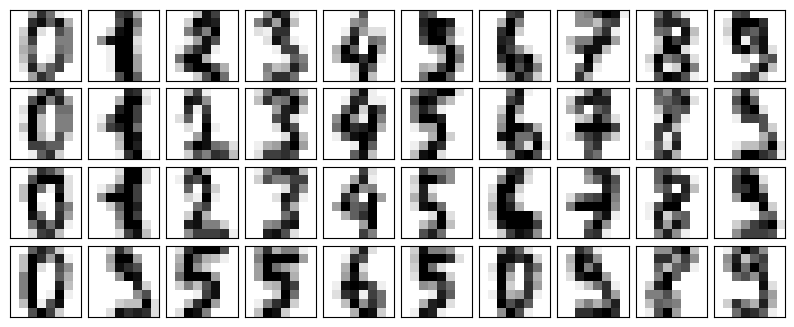

In [49]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', 
                  interpolation='nearest', clim=(0, 16))
        
plot_digits(digits.data)


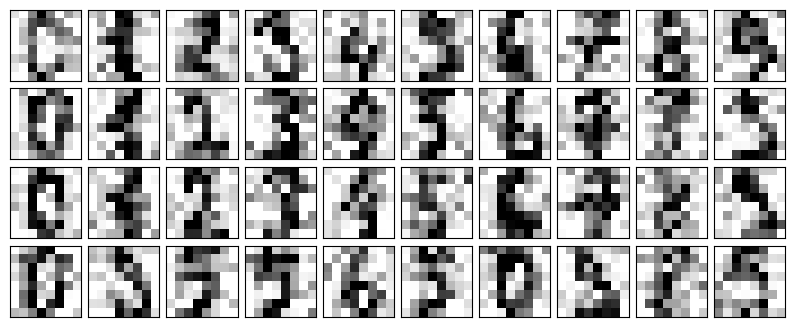

In [55]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

12


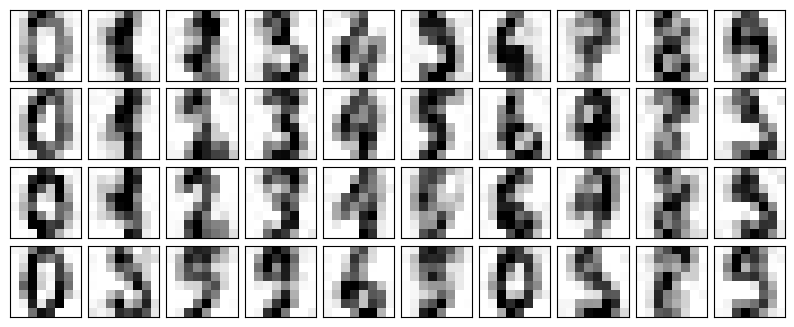

In [58]:
# PCA 를 수행
pca = PCA(0.50).fit(noisy)
# 주성분 개수 확인
print(pca.n_components_)

# 잡음이 섞인 이미지를 주성분 분석을 수행
components = pca.transform(noisy)

# 주성분 분석한 결과를 가지고 복원
filtered = pca.inverse_transform(components)
plot_digits(filtered)